In [1]:
import gym 
gym.version.VERSION

'0.10.3'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from gridworld_env import GridworldEnv

In [20]:
env = GridworldEnv(1) # Number of plan 

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


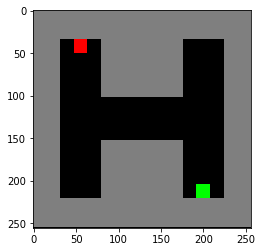

In [19]:
env.render()

In [5]:
print(env.reset())
print(env.action_space.sample())
env.step(env.action_space.sample())

[[1 1 1 1 1 1 1 1]
 [1 0 0 0 3 0 0 1]
 [1 0 1 0 0 0 1 1]
 [1 0 0 0 0 0 0 1]
 [1 0 0 4 0 0 1 1]
 [1 0 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]
4


(array([[1, 1, 1, 1, 1, 1, 1, 1],
        [1, 0, 0, 0, 3, 0, 0, 1],
        [1, 0, 1, 0, 0, 0, 1, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 4, 0, 0, 1, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 1, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1]]), -0.1, False, {'success': True})

In [6]:
env.verbose = True
print( env._get_agent_start_target_state())

((4, 3), (1, 4))


In [7]:
env.grid_map_shape

(8, 8)

In [8]:
env.observation_space

Box(8, 8)

In [9]:
env.action_space

Discrete(5)

-0.1
-0.1
-0.1
-0.6
-0.1
0.9
Total episode reward:  -0.09999999999999998


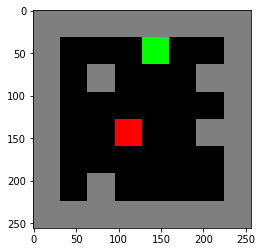

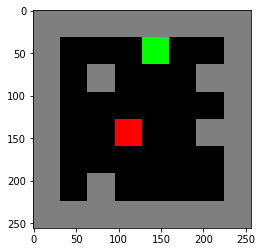

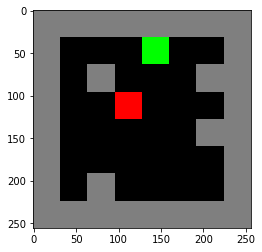

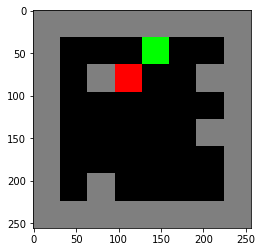

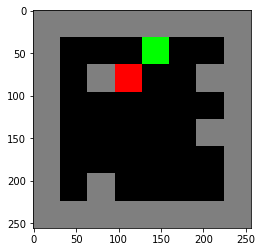

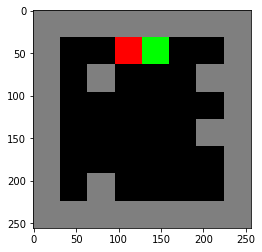

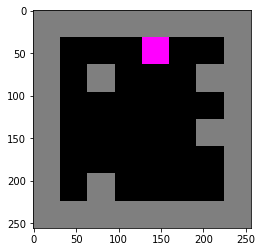

In [11]:
# Try random policy 
env.reset()
moves = [0,2,2,3,2,4]
env.render()
for i in range(len(moves)):
    move = env.action_space.sample()
    _, reward, _, _ =  env.step(moves[i]) 
    print(reward)
    env.render()
print('Total episode reward: ', env.episode_total_reward)

## Q-learning Example

In [13]:
# Q learning params
ALPHA = 0.1 # learning rate
GAMMA = 0.95 # reward discount
LEARNING_COUNT = 100
TEST_COUNT = 100

TURN_LIMIT = 1000
IS_MONITOR = True

class Agent:
    def __init__(self, env):
        self.env = env
        self.episode_reward = 0.0
        self.q_val = np.zeros(64 * 5).reshape(64, 5).astype(np.float32)

    def learn(self):
        # one episode learning
        state = self.env.reset()
        state = 8*np.where( state == 4)[0][0] + np.where(state == 4)[1][0]
        #self.env.render()
        
        for t in range(TURN_LIMIT):
            act = self.env.action_space.sample() # random
            next_state, reward, done, info = self.env.step(act)
            if not done:
                next_state = 8*np.where( next_state == 4)[0][0] + np.where( next_state == 4)[1][0]
            q_next_max = np.max(self.q_val[next_state])
            # Q <- Q + a(Q' - Q)
            # <=> Q <- (1-a)Q + a(Q')
            self.q_val[state][act] = (1 - ALPHA) * self.q_val[state][act]\
                                 + ALPHA * (reward + GAMMA * q_next_max)
            
            self.episode_reward += reward
            #self.env.render()
            if done:
                return self.env.episode_total_reward
            else:
                state = next_state
                
        return 0.0 # over limit

    def test(self):
        state = self.env.reset()
        state = 8*np.where( state == 4)[0][0] + np.where(state == 4)[1][0]
        for t in range(TURN_LIMIT):
            act = np.argmax(self.q_val[state])
            next_state, reward, done, info = self.env.step(act)
            if not done:
                next_state = 8*np.where( next_state == 4)[0][0] + np.where( next_state == 4)[1][0]
                
            if done:
                return self.env.episode_total_reward
            else:
                state = next_state
        return 0.0 # over limit

env = GridworldEnv(1)
env.reset()
agent = Agent(env)

print("###### LEARNING #####")
reward_total = 0.0
for i in range(LEARNING_COUNT):
    reward_total += agent.learn()
print("episodes      : {}".format(LEARNING_COUNT))
print("total reward  : {}".format(reward_total))
print("average reward: {:.2f}".format(reward_total / LEARNING_COUNT))
print("Q Value       :{}".format(agent.q_val))

print("###### TEST #####")
reward_total = 0.0
for i in range(TEST_COUNT):
    reward_total += agent.test()
print("episodes      : {}".format(TEST_COUNT))
print("total reward  : {}".format(reward_total))
print("average reward: {:.2f}".format(reward_total / TEST_COUNT))



WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
###### LEARNING #####
episodes      : 100
total reward  : -2370.0000000000014
average reward: -23.70
Q Value       :[[ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.30260843  0.115061   -0.32578725 -0.27431417  0.49821007]
 [ 0.4931729  -0.02127104 -0.03511592  0.26575032  0.69535434]
 [ 0.6280969   0.52717566  0.15321247  0.47617394  0.8721872 ]
 [ 0.          0.          0.

In [14]:
Q = agent.q_val 
policy_function = np.argmax( Q , axis = 1).reshape(8,8)

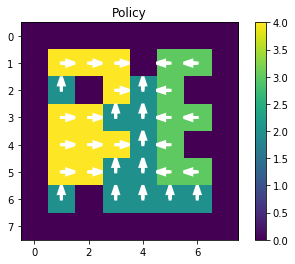

In [15]:
def plot_policy( policy_function ):

    plt.figure()
    plt.imshow( policy_function , interpolation='none' )
    plt.colorbar()

    for row in range( policy_function.shape[0] ):
        for col in range( policy_function.shape[1] ):
            if policy_function[row][col] == 0:
                continue 
            if policy_function[row][col] == 1:
                dx = 0; dy = .5
            if policy_function[row][col] == 2:
                dx = 0; dy = -.5
            if policy_function[row][col] == 3:
                dx = -.5; dy = 0
            if policy_function[row][col] == 4:
                dx = .5; dy = 0
            plt.arrow( col , row , dx , dy , shape='full', fc='w' , ec='w' , lw=3, length_includes_head=True, head_width=.2 )
    plt.title( 'Policy' )        
    plt.show() 
plot_policy(policy_function)

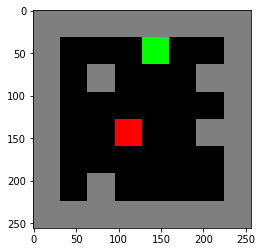

In [17]:
env.reset()
env.render()